In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


#### Part 1 - Importing Data

In [2]:
#set path
path = r'\Users\rtkel\Documents\Data Analytics Course\Instacart Basket Analysis'

In [3]:
#Import Data from 4.9
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_merged_final.pkl'))


In [4]:
ords_prods_merged.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Regularly busy,Regularly days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Regularly busy,Regularly days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Regularly busy,Slow days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [5]:
ords_prods_merged.shape

(32434211, 34)

In [6]:
ords_prods_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434211 entries, 0 to 32434210
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   first_name              object  
 2   last_name               object  
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   n_dependants            int64   
 8   fam_status              object  
 9   income                  int64   
 10  order_id                int64   
 11  eval_set                object  
 12  order_number            int64   
 13  orders_day_of_week      int64   
 14  hour_of_order           int64   
 15  days_since_prior_order  float64 
 16  product_id              int64   
 17  add_to_cart_order       int64   
 18  reordered               int64   
 19  Unnamed: 0              int64   
 20  product_name            object  
 21  aisle_

#### Part 2 - Security Implications

Customer names constitute personally identifiable information (PII) and should be excluded from the dataset, as they are also not relevant to the analysis we are currently undertaking.

In [7]:
#Drop first_name and last_name column
ords_prods_merged = ords_prods_merged.drop(['first_name', 'last_name'], axis=1)

In [8]:
#check removal
ords_prods_merged.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,both,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,both,Regularly busy,Regularly days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,both,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,both,Regularly busy,Regularly days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,both,Regularly busy,Slow days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


#### Part 3 - Customer Behavior

Assign Regions

In [9]:
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [10]:
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']


In [11]:
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky',
'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [12]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']


Create new columns with regions

In [13]:
ords_prods_merged.loc[ords_prods_merged['state'].isin(Northeast), 'region'] = 'Northeast'

In [14]:
ords_prods_merged.loc[ords_prods_merged['state'].isin(Midwest), 'region'] = 'Midwest'

In [15]:
ords_prods_merged.loc[ords_prods_merged['state'].isin(South), 'region'] = 'South'

In [16]:
ords_prods_merged.loc[ords_prods_merged['state'].isin(West), 'region'] = 'West'

In [17]:
#Check value counts of regions
ords_prods_merged['region'].value_counts(dropna=False)


region
South        10801610
West          8300444
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [18]:
ords_prods_merged.head()


,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Regularly busy,Regularly days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Regularly busy,Regularly days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,Regularly busy,Slow days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest


Determining whether there’s a difference in spending habits between the different
U.S. regions by creating a crosstab between the 'spending_flag' and 'region' variable.

In [19]:
crosstab_spending_region = pd.crosstab (ords_prods_merged['spending_flag'], ords_prods_merged['region'], dropna = False)

In [20]:
#check
crosstab_spending_region

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,156129,108343,210182,160807
Low spender,7447681,5620004,10591428,8139637


#### Part 4 - Exclusion Flag

In [21]:
#create exclusion flag for low-activity customers
ords_prods_merged.loc[ords_prods_merged['max_order'] < 5, 'activity_flag'] = 'low activity'

In [22]:
ords_prods_merged.loc[ords_prods_merged['max_order'] >= 5, 'activity_flag'] = 'active customer'

In [23]:
#value count
ords_prods_merged['activity_flag'].value_counts(dropna=False)


activity_flag
active customer    30992663
low activity        1441548
Name: count, dtype: int64

In [24]:
#create subset of low-activity customers
ords_prods_merged_low_activity = ords_prods_merged[ords_prods_merged['activity_flag'] =='low activity']

In [25]:
ords_prods_merged_low_activity.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,region,activity_flag
284,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1903574,prior,...,Regularly days,Average orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low activity
285,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1193140,prior,...,Slow days,Most orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low activity
286,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1870356,prior,...,Busiest days,Average orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low activity
733,51,Female,Wyoming,37,1/1/2017,1,married,71190,2151817,prior,...,Regularly days,Most orders,3,New customer,8.693103,Low spender,17.0,Regular customer,West,low activity
734,51,Female,Wyoming,37,1/1/2017,1,married,71190,1099991,prior,...,Slow days,Most orders,3,New customer,8.693103,Low spender,17.0,Regular customer,West,low activity


In [26]:
#export low-activity customers subset
ords_prods_merged_low_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merged_low_activity.pkl'))


#### Part 5 - Profiling Variables

Create Age groups

In [27]:
#check descriptive statistics for age
ords_prods_merged['age'].describe()

count    3.243421e+07
mean     4.946521e+01
std      1.848553e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [28]:
#create young adult (18-29) age group
ords_prods_merged.loc[(ords_prods_merged['age'] >= 18) & (ords_prods_merged['age'] <= 29), 'age_group'] = 'Young adult (18-29)'


In [29]:
#create adult (30-45) age group
ords_prods_merged.loc[(ords_prods_merged['age'] >= 30) & (ords_prods_merged['age'] <= 45), 'age_group'] = 'Adult (30-45)'


In [30]:
#create adult (46-64) age group
ords_prods_merged.loc[(ords_prods_merged['age'] >= 46) & (ords_prods_merged['age'] <= 64), 'age_group'] = 'Adult (46-64)'


In [31]:
#create senior (65+) age group
ords_prods_merged.loc[(ords_prods_merged['age'] >= 65), 'age_group']  = 'Senior (65+)'

In [32]:
#check output for age_group
ords_prods_merged['age_group'].value_counts(dropna=False)

age_group
Adult (46-64)          9637598
Senior (65+)           8582637
Adult (30-45)          8117873
Young adult (18-29)    6096103
Name: count, dtype: int64

Create Income groups

In [33]:
ords_prods_merged['income'].describe()

count    3.243421e+07
mean     9.943525e+04
std      4.305473e+04
min      2.590300e+04
25%      6.699800e+04
50%      9.661200e+04
75%      1.279080e+05
max      5.939010e+05
Name: income, dtype: float64

In [34]:
ords_prods_merged.loc[ords_prods_merged['income'] <= 67000, 'income_group'] = 'Low Income'


In [35]:
ords_prods_merged.loc[(ords_prods_merged['income'] > 67000) & (ords_prods_merged['income'] <= 125000), 'income_group'] = 'Middle Income'

In [36]:
ords_prods_merged.loc[ords_prods_merged['income'] >= 125000, 'income_group'] = 'High Income'

In [37]:
ords_prods_merged['income_group'].value_counts(dropna=False)

income_group
Middle Income    15687193
High Income       8638425
Low Income        8108593
Name: count, dtype: int64

Family status and dependents

In [38]:
#check counts for family status
ords_prods_merged['fam_status'].value_counts(dropna=False)

fam_status
married                             22776913
single                               5330768
divorced/widowed                     2774428
living with parents and siblings     1552102
Name: count, dtype: int64

In [39]:
#check counts for n_dependents
ords_prods_merged['n_dependants'].value_counts(dropna=False)

n_dependants
3    8142318
0    8105196
2    8098387
1    8088310
Name: count, dtype: int64

In [40]:
#create crosstab
family_profile = pd.crosstab(ords_prods_merged['fam_status'], ords_prods_merged['n_dependants'], dropna = False)

In [41]:
family_profile

n_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2774428,0,0,0
living with parents and siblings,0,530618,508485,512999
married,0,7557692,7589902,7629319
single,5330768,0,0,0


Create three flags: Single adult (0 dependents, divorced, or single), married with dependents (married with dependents), Young adult (living with parents and sibilings with 1+ dependents)

In [42]:
ords_prods_merged.loc[(ords_prods_merged['fam_status'].isin(['divorced/widowed','single']), 'fam_status_flag')] = 'Single adult'


In [43]:
ords_prods_merged.loc[(ords_prods_merged['fam_status'].isin(['married']), 'fam_status_flag')] = 'Married with dependents'


In [44]:
ords_prods_merged.loc[(ords_prods_merged['fam_status'].isin(['living with parents and siblings']), 'fam_status_flag')] = 'Young adult'


In [45]:
#check counts
ords_prods_merged['fam_status_flag'].value_counts(dropna=False)

fam_status_flag
Married with dependents    22776913
Single adult                8105196
Young adult                 1552102
Name: count, dtype: int64

Create labels based on "department_id"

In [46]:
# Downloading "departments_wrangled" data
departments = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv'))


In [47]:
departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [48]:
#Rename Unnamed: 0' to 'department_id'
departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [49]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [50]:
ords_prods_merged['department_id'].value_counts(dropna=False)

department_id
4     9479291
16    5414016
19    2887550
7     2688159
1     2236432
13    1875577
3     1176787
15    1068057
20    1051249
9      866627
17     738666
14     710647
12     708931
11     447691
18     423802
6      269253
5      153743
8       97724
21      69145
2       36291
10      34573
Name: count, dtype: int64

In [51]:
ords_prods_merged['department_id'].replace({
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'intentional',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}, inplace=True)

In [52]:
ords_prods_merged['department_id'].value_counts(dropna=False)

department_id
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2688159
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068057
deli               1051249
dry goods pasta     866627
household           738666
breakfast           710647
meat seafood        708931
personal care       447691
babies              423802
intentional         269253
alcohol             153743
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

#### Part 6 - Profiles

In [53]:
#Age group aggregate
age_group_aggregate = ords_prods_merged.groupby('age_group').agg({'order_number': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})


In [54]:
age_group_aggregate

order_number             prices              
                            mean min max       mean  min      max
age_group                                                        
Adult (30-45)          17.174897   1  99  12.167090  1.0  99999.0
Adult (46-64)          17.175553   1  99  11.891387  1.0  99999.0
Senior (65+)           17.097254   1  99  11.770022  1.0  99999.0
Young adult (18-29)    17.107748   1  99  12.172667  1.0  99999.0

In [55]:
#Income group aggregate
income_group_aggregate = ords_prods_merged.groupby('income_group').agg({'order_number': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})


In [56]:
income_group_aggregate

order_number             prices              
                      mean min max       mean  min      max
income_group                                               
High Income      17.281726   1  99  21.341418  1.0  99999.0
Low Income       16.645592   1  99   7.296539  1.0  14900.0
Middle Income    17.321492   1  99   9.248185  1.0  99999.0

In [57]:
#Family status aggregate
fam_status_aggregate = ords_prods_merged.groupby('fam_status_flag').agg({'order_number': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})


In [58]:
fam_status_aggregate

order_number             prices              
                                mean min max       mean  min      max
fam_status_flag                                                      
Married with dependents    17.087700   1  99  12.006531  1.0  99999.0
Single adult               17.264681   1  99  12.130045  1.0  99999.0
Young adult                17.296642   1  99  10.831020  1.0  99999.0

In [59]:
department_id_aggregate = ords_prods_merged.groupby('department_id').agg({'order_number': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})


In [60]:
department_id_aggregate

order_number             prices              
                        mean min max       mean  min      max
department_id                                                
alcohol            15.213779   1  99   8.144407  1.0     15.0
babies             19.310397   1  99   7.638380  1.0     15.0
bakery             17.179756   1  99   7.864723  1.0     15.0
beverages          17.225773   1  99   7.680574  1.0     15.0
breakfast          16.757377   1  99   8.065461  1.0     14.9
bulk               20.197148   1  99   8.348960  1.4     14.1
canned goods       16.165046   1  99   7.539978  1.0     15.0
dairy eggs         17.663250   1  99  33.425510  1.0  99999.0
deli               16.473447   1  99   7.778701  1.0     15.0
dry goods pasta    15.895474   1  99   7.350283  1.0     15.0
frozen             15.457687   1  99   7.741434  1.0     15.0
household          15.694469   1  99   7.384058  1.0     15.0
intentional        16.439806   1  99   7.682264  1.0     15.0
meat seafood       15.887622   1  99  16.294469  8.0     25.0
missing            22.902379   1  99   8.660716  1.0     15.0
other              17.277920   1  99   6.990934  1.1     15.0
pantry             16.583304   1  99   8.009901  1.0     20.0
personal care      16.170828   1  99   7.996657  1.0     15.0
pets               15.340520   1  99   7.889636  1.0     15.0
produce            17.811403   1  99   7.981708  1.0     15.0
snacks             17.177343   1  99   4.275437  1.6      7.0

In [61]:
age_group_by_region = pd.crosstab(ords_prods_merged['age_group'], ords_prods_merged['region'], dropna = False)

In [62]:
age_group_by_region

region,Midwest,Northeast,South,West
age_group,,,,
Adult (30-45),1914119,1415733,2739582,2048439
Adult (46-64),2275476,1685562,3168666,2507894
Senior (65+),1992341,1555423,2838754,2196119
Young adult (18-29),1421874,1071629,2054608,1547992


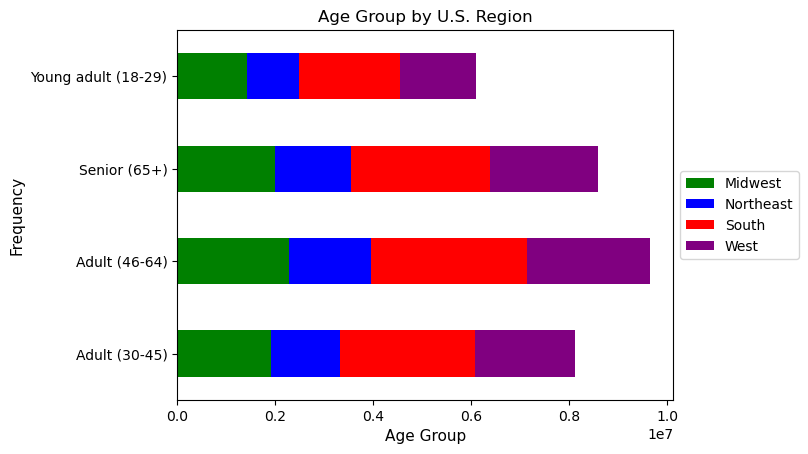

In [63]:
#Age group by region
age_group_region_bar_chart = age_group_by_region.plot.barh(stacked = True, color = ['green', 'blue', 'red', 'purple'])
plt.xlabel("Age Group", fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.title("Age Group by U.S. Region", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [64]:
#export
age_group_region_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_region_bar_chart.png'))


In [65]:
income_group_region = pd.crosstab(ords_prods_merged['income_group'], ords_prods_merged['region'], dropna = False)

In [66]:
income_group_region

region,Midwest,Northeast,South,West
income_group,,,,
High Income,2055362,1540849,2838718,2203496
Low Income,1877746,1430504,2718889,2081454
Middle Income,3670702,2756994,5244003,4015494


In [67]:
fam_status_region = pd.crosstab(ords_prods_merged['fam_status_flag'], ords_prods_merged['region'], dropna = False)

In [68]:
fam_status_region

region,Midwest,Northeast,South,West
fam_status_flag,,,,
Married with dependents,5330068,4040166,7567385,5839294
Single adult,1906957,1419701,2704175,2074363
Young adult,366785,268480,530050,386787


#### Other graphs needed for analysis.

In [69]:
ords_prods_merged['orders_day_of_week'] = ords_prods_merged['orders_day_of_week'].replace({0: 'Saturday',1: 'Sunday',2: 'Monday',3: 'Tuesday',4: 'Wednesday',5: 'Thursday',6: 'Friday'})

In [70]:
custom_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

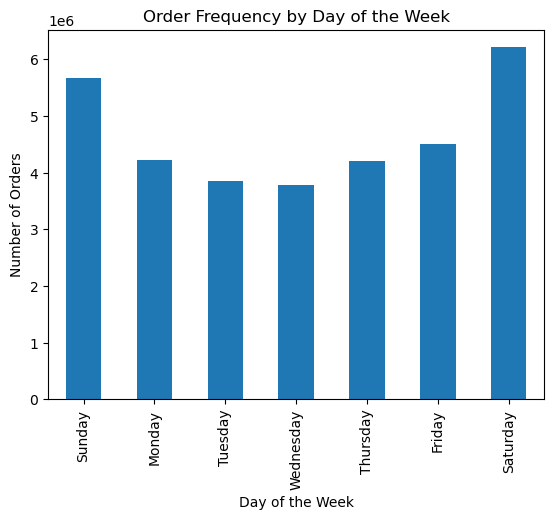

In [71]:
orders_by_day_barchart = ords_prods_merged['orders_day_of_week'].value_counts().loc[custom_order].plot.bar()
plt.title('Order Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

In [72]:
#export
orders_by_day_barchart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_by_day_barchart.png'))

In [73]:
ords_prods_merged['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [74]:
ords_prods_merged.loc[(ords_prods_merged['prices'] > 4.2) & (ords_prods_merged['prices'] <= 11.30), 'price_groups'] = 'Middle Priced Product'

In [75]:
ords_prods_merged.loc[ords_prods_merged['prices'] <= 4.2, 'price_groups'] = 'Low Priced Product'

In [76]:
ords_prods_merged.loc[ords_prods_merged['prices'] >= 11.3, 'price_groups'] = 'High Priced Product'

In [77]:
ords_prods_merged['price_groups'].value_counts(dropna=False)

price_groups
Middle Priced Product    16161537
Low Priced Product        8136629
High Priced Product       8136045
Name: count, dtype: int64

In [78]:
department_by_price = pd.crosstab(ords_prods_merged['department_id'], ords_prods_merged['price_groups'], dropna = False)

In [79]:
department_by_price

price_groups,High Priced Product,Low Priced Product,Middle Priced Product
department_id,,,
alcohol,39680,27293,86770
babies,91084,92421,240297
bakery,254953,226364,695470
beverages,684200,727619,1276340
breakfast,221555,172753,316339
bulk,12270,174,22129
canned goods,215652,194372,658033
dairy eggs,1756653,1175110,2482253
deli,233835,269756,547658


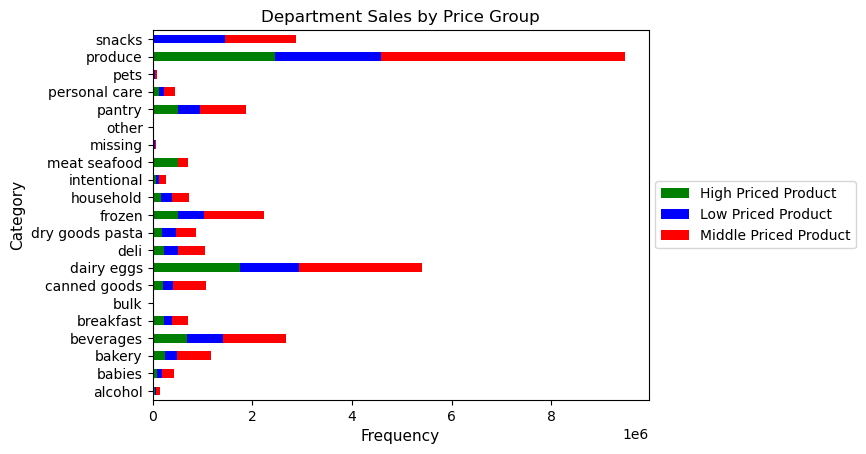

In [83]:
#Price group by category
department_by_price_bar_chart = department_by_price.plot.barh(stacked = True, color = ['green', 'blue', 'red'])
plt.xlabel("Frequency", fontsize=11)
plt.ylabel("Category",fontsize=11)
plt.title("Department Sales by Price Group", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [84]:
#export
department_by_price_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'categorgy_by_price_bar_chart.png'))

In [97]:
department_by_loyalty = pd.crosstab(ords_prods_merged['department_id'], ords_prods_merged['loyalty_flag'], dropna = False)

In [98]:
department_by_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
alcohol,38726,37716,77301
babies,167108,60118,196576
bakery,381686,224397,570704
beverages,855024,512883,1320252
breakfast,223866,139909,346872
bulk,13834,5271,15468
canned goods,294594,236179,537284
dairy eggs,1835676,974289,2604051
deli,324046,205750,521453


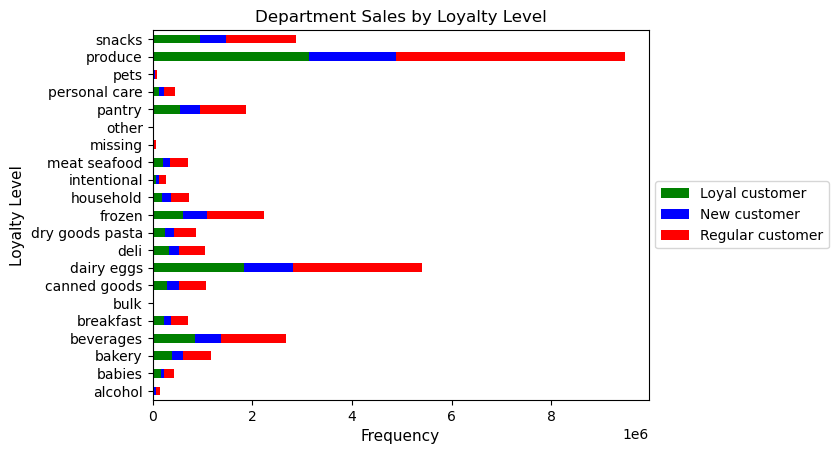

In [99]:
#Price group by category
department_by_loyalty_bar_chart = department_by_loyalty.plot.barh(stacked = True, color = ['green', 'blue', 'red'])
plt.xlabel("Frequency", fontsize=11)
plt.ylabel("Loyalty Level",fontsize=11)
plt.title("Department Sales by Loyalty Level", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [101]:
#export
department_by_loyalty_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_by_loyalty_bar_chart.png'))

In [102]:
region_department_id = pd.crosstab (ords_prods_merged['department_id'], ords_prods_merged['region'], dropna = False)

In [103]:
region_department_id

region,Midwest,Northeast,South,West
department_id,,,,
alcohol,36195,26559,51633,39356
babies,98983,75139,143654,106026
bakery,274777,209468,390294,302248
beverages,625585,483422,898957,680195
breakfast,165269,125068,236753,183557
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274585
dairy eggs,1267696,956809,1801966,1387545
deli,245678,186817,349419,269335


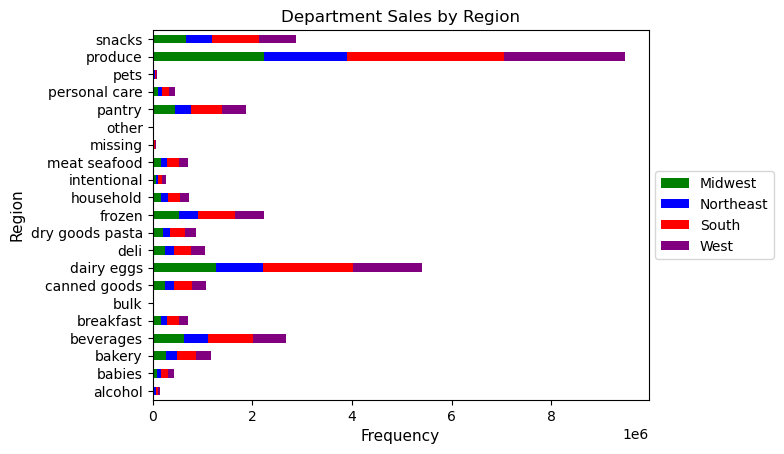

In [105]:
#Department Sales by Region
department_by_region_bar_chart = region_department_id.plot.barh(stacked = True, color = ['green', 'blue', 'red','purple'])
plt.xlabel("Frequency", fontsize=11)
plt.ylabel("Region",fontsize=11)
plt.title("Department Sales by Region", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [106]:
#export
department_by_region_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_by_region_bar_chart.png'))

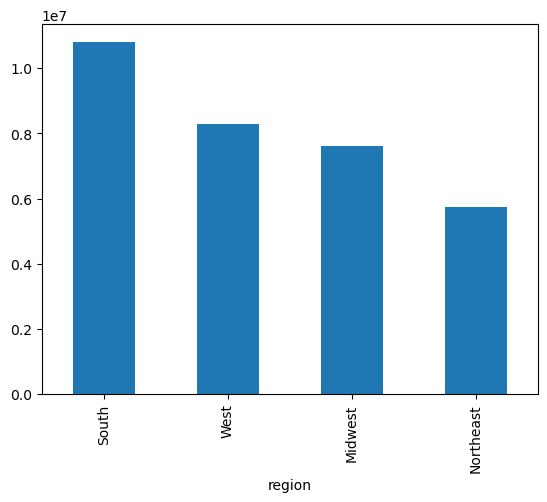

In [107]:
#Sales by Region
region_sales_bar_chart = ords_prods_merged['region'].value_counts().plot.bar()

In [108]:
#export
region_sales_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_sales_bar_chart.png'))

In [112]:
age_by_department = pd.crosstab(ords_prods_merged['department_id'], ords_prods_merged['age_group'], dropna = False)

In [113]:
age_by_department

age_group,Adult (30-45),Adult (46-64),Senior (65+),Young adult (18-29)
department_id,,,,
alcohol,39006,45899,39063,29775
babies,107278,126615,109445,80464
bakery,295637,349433,310476,221241
beverages,667506,806265,714840,499548
breakfast,176573,212472,185765,135837
bulk,8626,10099,9242,6606
canned goods,266108,316570,282438,202941
dairy eggs,1361279,1601595,1430351,1020791
deli,263429,312768,277618,197434


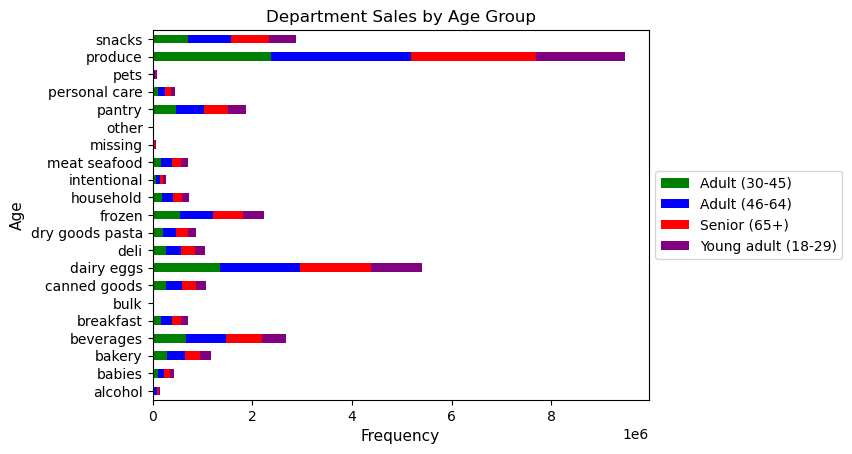

In [114]:
#Department Sales by Age
department_by_age_group_bar_chart = age_by_department.plot.barh(stacked = True, color = ['green', 'blue', 'red','purple'])
plt.xlabel("Frequency", fontsize=11)
plt.ylabel("Age",fontsize=11)
plt.title("Department Sales by Age Group", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [118]:
#export
department_by_age_group_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_by_age_group_bar_chart.png'))

In [119]:
fam_status_by_department = pd.crosstab(ords_prods_merged['department_id'], ords_prods_merged['fam_status'], dropna = False)

In [120]:
fam_status_by_department

fam_status,divorced/widowed,living with parents and siblings,married,single
department_id,,,,
alcohol,12634,8897,105703,26509
babies,35326,20146,297162,71168
bakery,100720,56377,824872,194818
beverages,231027,124631,1889078,443423
breakfast,60180,35046,499044,116377
bulk,2765,1674,24621,5513
canned goods,89259,51190,752030,175578
dairy eggs,463374,261636,3798992,890014
deli,90818,50415,735689,174327


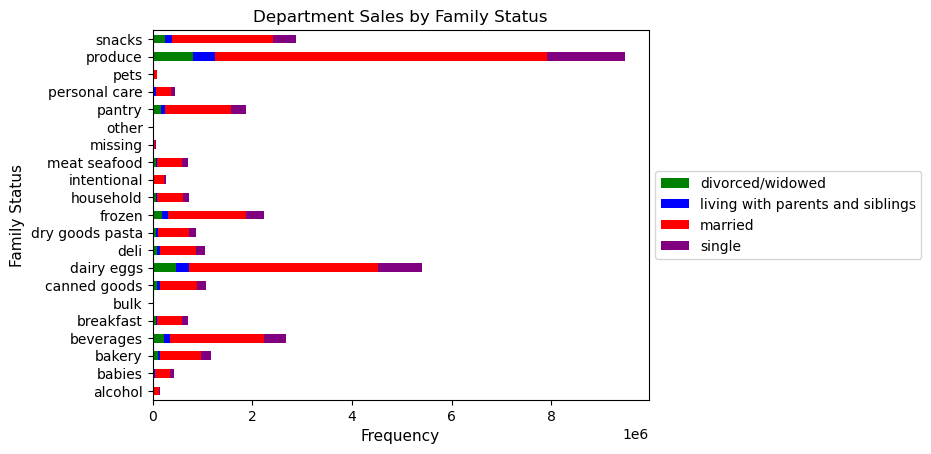

In [121]:
#Department Sales by Fam Status
department_sales_by_fam_status = fam_status_by_department.plot.barh(stacked = True, color = ['green', 'blue', 'red','purple'])
plt.xlabel("Frequency", fontsize=11)
plt.ylabel("Family Status",fontsize=11)
plt.title("Department Sales by Family Status", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [122]:
#export
department_sales_by_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_sales_by_fam_status.png'))